# Notebook Objective 
Load, visualize, and understand the dataset

# Dataset Details

All the sensors are re-sampled to the same 15 minute interval 

__Internal Sensors Capturing Conditions in the Spheres__
- 4 Sensors for [Carbon Dioxide](https://en.wikipedia.org/wiki/Carbon_dioxide) CO2 [ ppm ]  
  - *column names: co2_1, co2_2, co2_3, co2_4*
  
  
- 4 Sensors for [Temperature](https://en.wikipedia.org/wiki/Temperature) [ degrees F ]
  - *column names: temp_1, temp_2, temp_3, temp_4*
  
  
- 4 Sensors for [Dewpoint Sensors](https://en.wikipedia.org/wiki/Dew_point) [ degrees F ]
  - *column names: dew_1, dew_2, dew_3, dew_4*


- 4 Sensors for [Relative Humidity](https://en.wikipedia.org/wiki/Relative_humidity) [ % ]
  - *column names: relH_1, relH_2, relH_3, relH_4*
  
__External Sensors Capturing Conditions in Downtown Seattle__
- 1 Sensor for External Temperature
  - *column name: externTemp_1*


- 1 Sensor for External Humidity 
  - *column name: externHumid_1*


- 1 Sensor for External Condition 
  - *column name: externCondition_1*
  - values: 0 = 'clear', 1 = 'cloudy', 2 = 'flurries', 3 = 'ice', 4 = 'partlyCloudy', 5 = 'rain', 6 = 'showers', 7 = 'snow', 8 = 'thunderstorms'



- 1 Sensor for External Sunrise 
  - *column name: externSunrise_1*
  - values: 0 = sun is set, 1 = sun is out



In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Download Dataset(s) 

In [2]:
!wget https://environmental-hack.s3-us-west-2.amazonaws.com/data.zip

--2019-07-12 07:11:24--  https://environmental-hack.s3-us-west-2.amazonaws.com/data.zip
Resolving environmental-hack.s3-us-west-2.amazonaws.com (environmental-hack.s3-us-west-2.amazonaws.com)... 52.218.216.225
Connecting to environmental-hack.s3-us-west-2.amazonaws.com (environmental-hack.s3-us-west-2.amazonaws.com)|52.218.216.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36866147 (35M) [application/zip]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>]  35.16M  56.6MB/s    in 0.6s    

2019-07-12 07:11:25 (56.6 MB/s) - ‘data.zip.1’ saved [36866147/36866147]



In [3]:
!unzip data.zip

Archive:  data.zip
replace data/2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef_sampleBounds.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
!cd data && ls

2018-01-01__2019-01-01__NConservatory__allMerged.csv
2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef.npy
2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef_sampleBounds.npy
2018-01-01__2019-01-01__NConservatory__scalingParams.npy
2018-01-01__2019-01-01__NConservatory__zoneSensorSeries.npy
2018-01-01__2019-01-01__SConservatory__allMerged.csv
2018-01-01__2019-01-01__SConservatory_npWeekdayAllOrderedSensorsTimeRef.npy
2018-01-01__2019-01-01__SConservatory_npWeekdayAllOrderedSensorsTimeRef_sampleBounds.npy
2018-01-01__2019-01-01__SConservatory__scalingParams.npy
2018-01-01__2019-01-01__SConservatory__zoneSensorSeries.npy


# Load Raw Data

In [5]:
dataset = pd.read_csv( index_col = 0,  parse_dates = True, infer_datetime_format = True, 
                         filepath_or_buffer = './data/2018-01-01__2019-01-01__NConservatory__allMerged.csv')
dataset.index = pd.to_datetime(dataset.index, utc=True).tz_convert('America/Los_Angeles')

In [6]:
externConditionLabelEncoder = LabelEncoder();
externConditionLabelEncoder.fit(['clear', 'cloudy', 'partlyCloudy', 'rain', 'showers', 'thunderstorms', 'ice', 'flurries', 'snow']);

# Explore Data

In [7]:
dataset.head()

,co2_1,co2_2,co2_3,co2_4,dew_1,dew_2,dew_3,dew_4,relH_1,relH_2,relH_3,relH_4,temp_1,temp_2,temp_3,temp_4,externTemp_1,externHumid_1,externCondition_1,externSunrise_1
2018-01-01 00:00:03-08:00,480.750000,474.886993,477.817993,474.886993,52.214100,51.510899,51.862499,52.038300,73.917000,78.438202,77.531898,76.550697,59.400002,60.000000,58.799999,58.500000,35.0,76.0,4,1
2018-01-01 00:15:03-08:00,480.750000,474.886993,474.886993,474.886993,52.389801,51.686699,51.686699,51.862499,74.492798,79.800903,78.598999,76.601303,59.200001,59.799999,58.500000,58.299999,35.0,76.0,4,1
2018-01-01 00:30:03-08:00,477.817993,477.817993,474.886993,474.886993,52.214100,51.510899,51.510899,51.862499,74.275002,80.143303,78.370903,76.875603,59.099998,59.700001,58.299999,58.000000,35.0,77.0,4,1
2018-01-01 00:45:03-08:00,486.612000,477.817993,474.886993,477.817993,52.038300,51.335201,51.510899,51.510899,75.074402,79.912003,78.990196,76.428596,58.900002,59.400002,58.000000,57.799999,35.0,77.0,4,1
2018-01-01 01:00:03-08:00,486.612000,474.886993,477.817993,477.817993,51.862499,51.335201,51.159401,51.335201,74.635696,79.967499,79.274902,76.205597,58.799999,59.200001,57.799999,57.700001,35.0,77.0,4,1


In [8]:
dataset.index

DatetimeIndex(['2018-01-01 00:00:03-08:00', '2018-01-01 00:15:03-08:00',
               '2018-01-01 00:30:03-08:00', '2018-01-01 00:45:03-08:00',
               '2018-01-01 01:00:03-08:00', '2018-01-01 01:15:03-08:00',
               '2018-01-01 01:30:03-08:00', '2018-01-01 01:45:03-08:00',
               '2018-01-01 02:00:03-08:00', '2018-01-01 02:15:03-08:00',
               ...
               '2018-12-31 21:44:52-08:00', '2018-12-31 21:59:52-08:00',
               '2018-12-31 22:14:52-08:00', '2018-12-31 22:29:52-08:00',
               '2018-12-31 22:44:52-08:00', '2018-12-31 22:59:52-08:00',
               '2018-12-31 23:14:52-08:00', '2018-12-31 23:29:52-08:00',
               '2018-12-31 23:44:52-08:00', '2018-12-31 23:59:52-08:00'],
              dtype='datetime64[ns, America/Los_Angeles]', length=34934, freq=None)

In [9]:
dataset['co2_1'][0:10]

2018-01-01 00:00:03-08:00    480.750000
2018-01-01 00:15:03-08:00    480.750000
2018-01-01 00:30:03-08:00    477.817993
2018-01-01 00:45:03-08:00    486.612000
2018-01-01 01:00:03-08:00    486.612000
2018-01-01 01:15:03-08:00    474.886993
2018-01-01 01:30:03-08:00    477.817993
2018-01-01 01:45:03-08:00    477.817993
2018-01-01 02:00:03-08:00    480.750000
2018-01-01 02:15:03-08:00    474.886993
Name: co2_1, dtype: float64

In [10]:
dataset['co2_1'][0:10].values

array([480.75      , 480.75      , 477.81799316, 486.61199951,
       486.61199951, 474.88699341, 477.81799316, 477.81799316,
       480.75      , 474.88699341])

# Visualize Data

### Plotting parameters 
Make plots interactive & reduce whitespace in margins
For more options refer to 
- http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure
- https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

In [11]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9.5, 13]
plt.rcParams['figure.subplot.left'] = plt.rcParams['figure.subplot.bottom'] = .1
plt.rcParams['figure.subplot.right'] = plt.rcParams['figure.subplot.top'] = .9

### Visualize entire dataset 

<IPython.core.display.Javascript object>


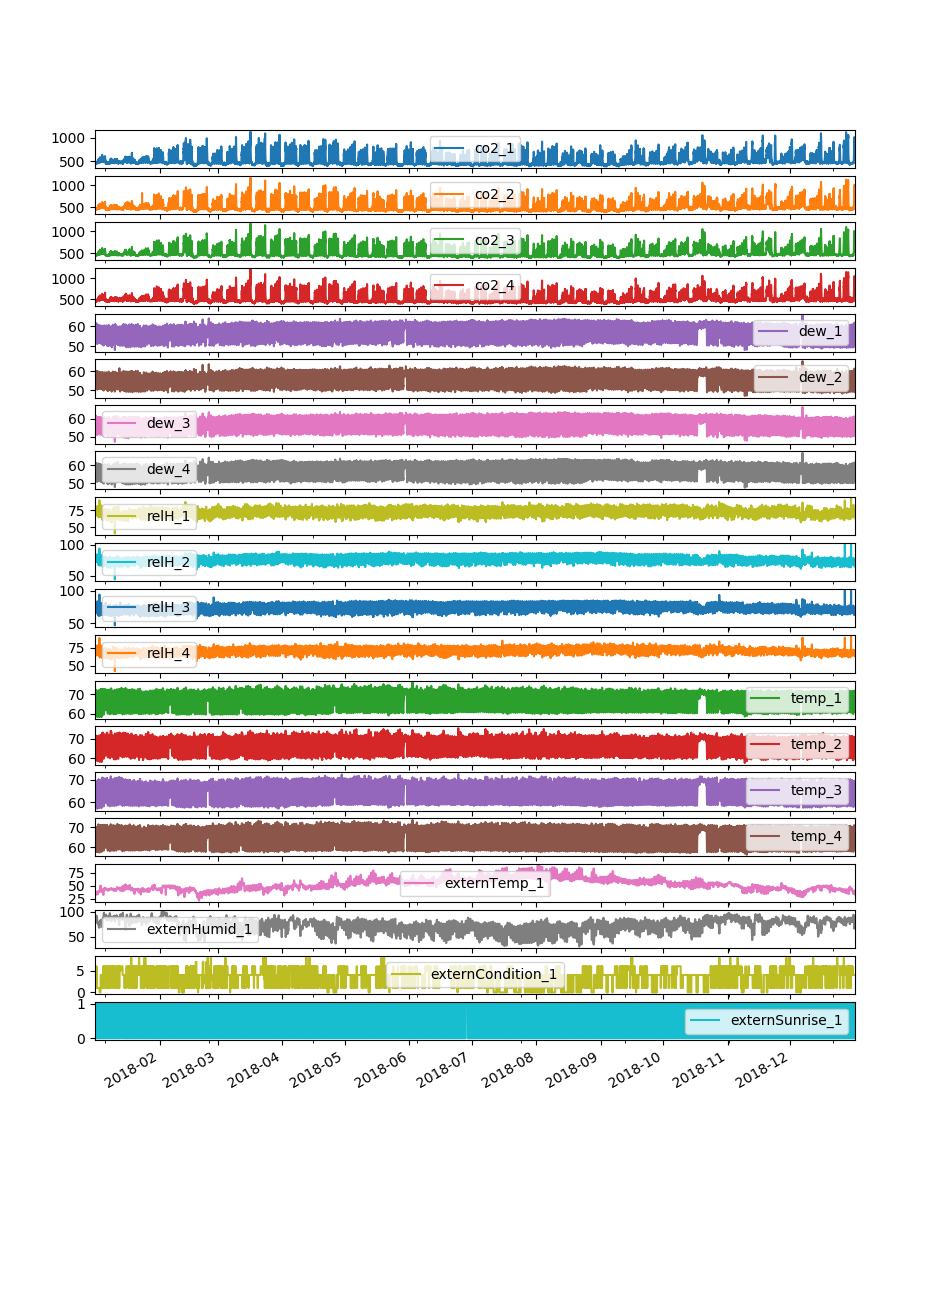

In [12]:
dataset.plot(subplots=True);

### Selecting a subset of sensors to plot [ co2 ]

<IPython.core.display.Javascript object>


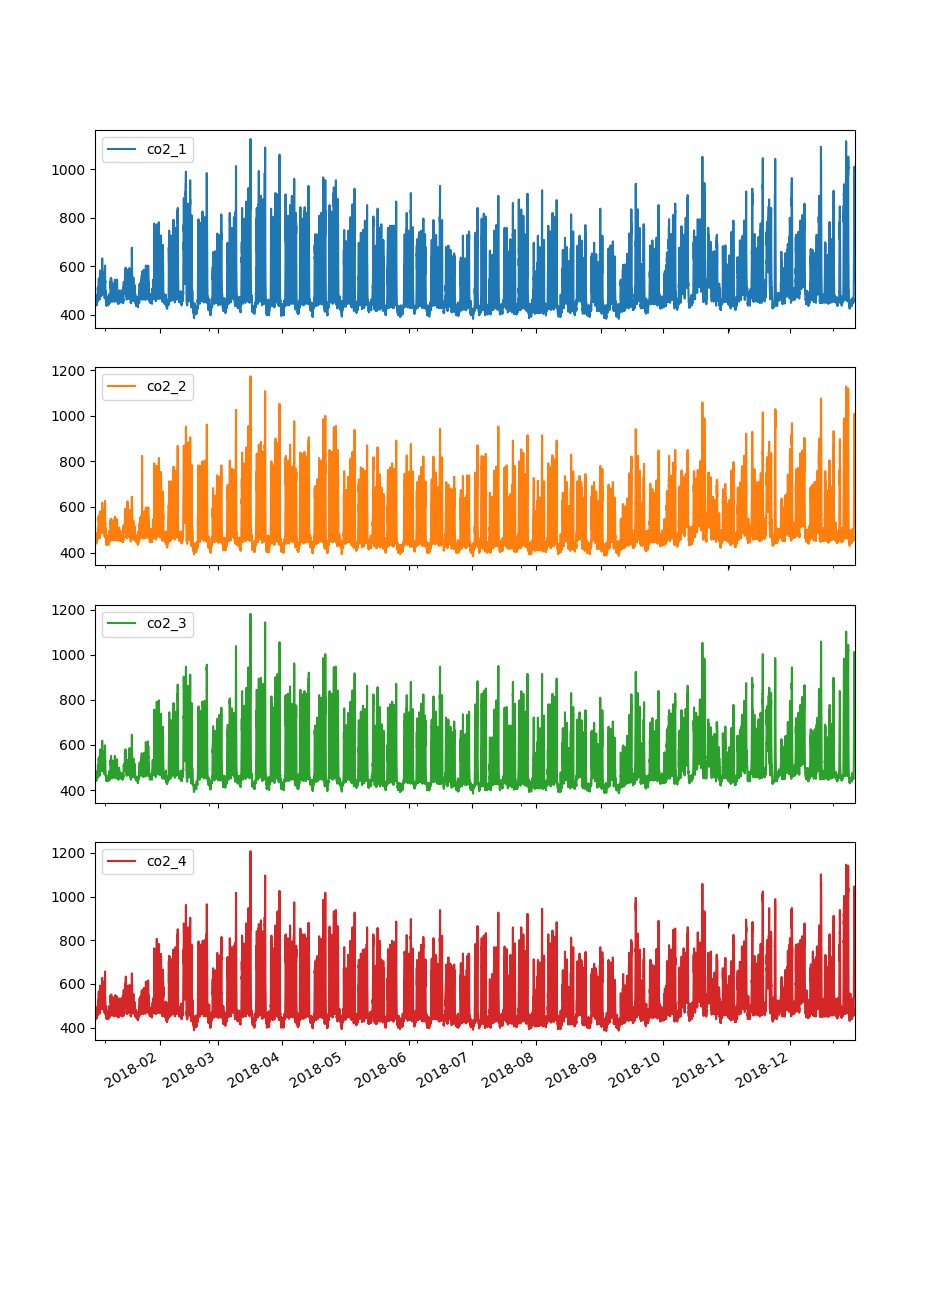

In [13]:
dataset[['co2_1', 'co2_2', 'co2_3', 'co2_4']].plot(subplots=True);

### First week of 2018 [ co2, temp, dew, relH ]
This cell uses a more explicit/fine-grained form of plotting using matplotlib syntax

<IPython.core.display.Javascript object>


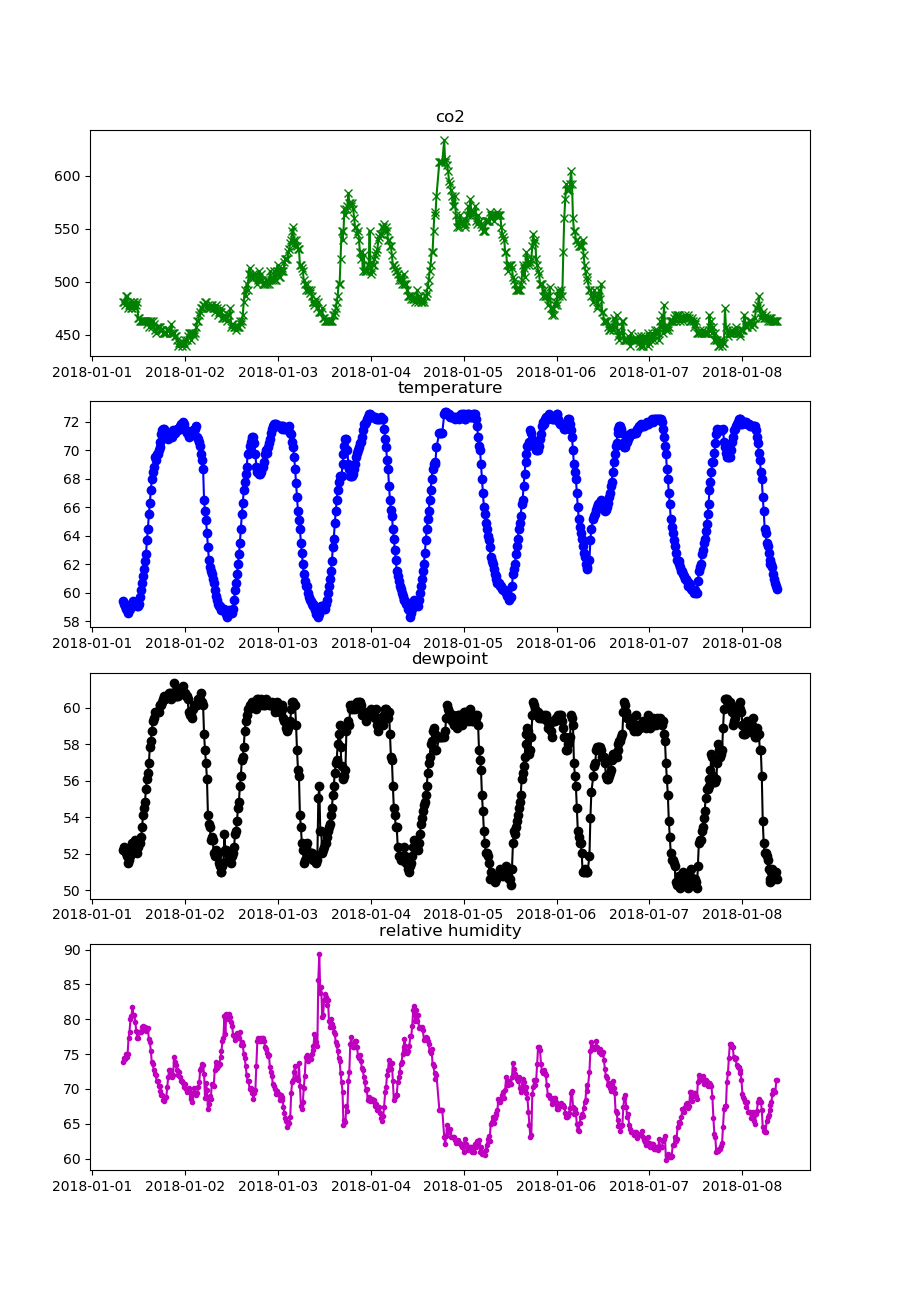

In [14]:
plt.figure( figsize = (9,13) )

plt.subplot(4,1,1)
plt.title('co2')
plt.plot( dataset['co2_1'][0:7*96], '-xg')

plt.subplot(4,1,2)
plt.title('temperature')
plt.plot( dataset['temp_1'][0:7*96], '-ob') 

plt.subplot(4,1,3)
plt.title('dewpoint')
plt.plot( dataset['dew_1'][0:7*96], '-ok') 

plt.subplot(4,1,4)
plt.title('relative humidity')
plt.plot( dataset['relH_1'][0:7*96], '-m.') 

plt.show()

### Closer look at temperature [ external and internal over the course of the first week ]

<IPython.core.display.Javascript object>


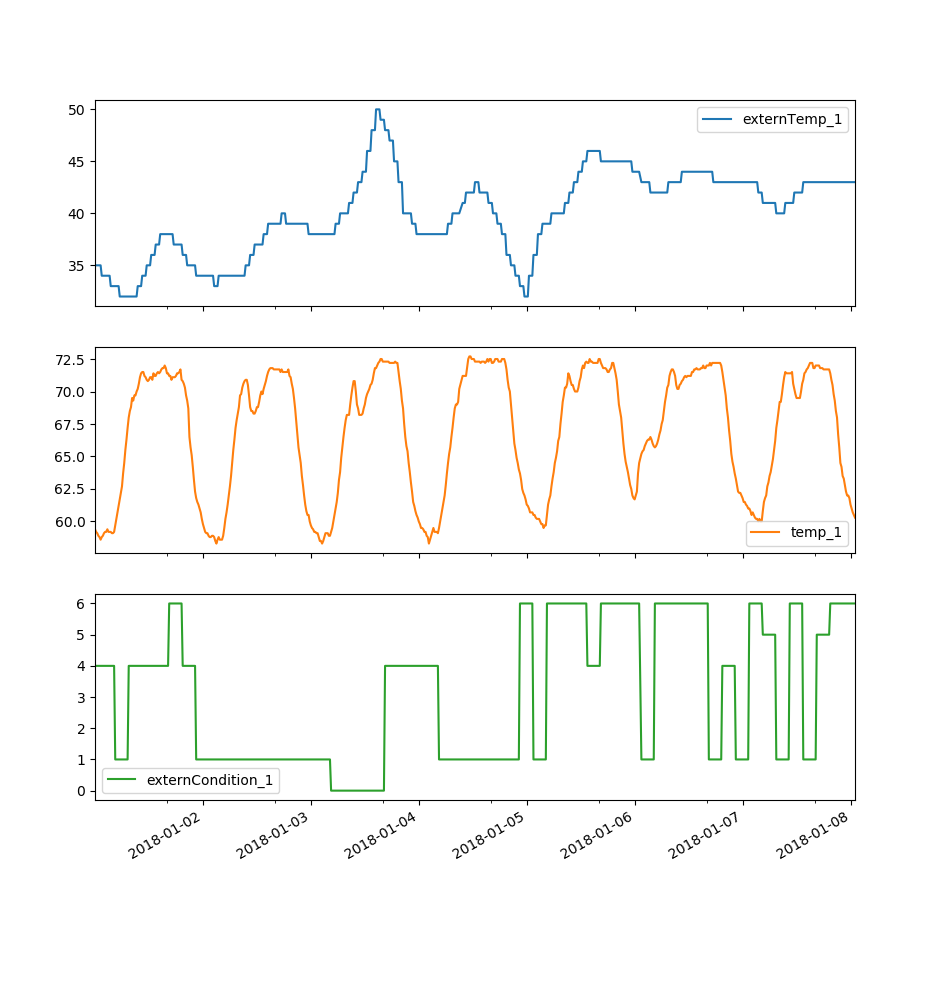

In [15]:
dataset[['externTemp_1', 'temp_1', 'externCondition_1']][0:96*7].plot(subplots=True, figsize=(9.5, 10));

### First week's external weather conditions

In [16]:
externConditionLabelEncoder.inverse_transform(dataset[ 'externCondition_1'][0:96*7])

array(['partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'cloudy', 'cloudy', 'cloudy',
       'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy',
       'cloudy', 'cloudy', 'cloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partlyCloudy', 'partlyCloudy', 'partlyCloudy', 'partlyCloudy',
       'partly

### Histogram of External Weather Conditions

<IPython.core.display.Javascript object>


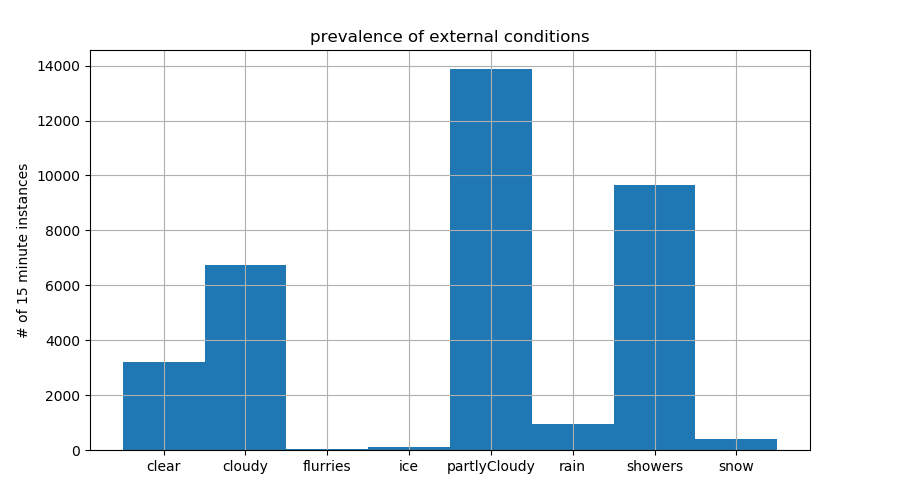

In [17]:
plt.figure(figsize=(9,5));

nPossibleConditons = len(externConditionLabelEncoder.classes_)

dataset['externCondition_1'].hist(bins=nPossibleConditons-1, align='left', rwidth=1);

plt.gca().set_xticklabels([''] + list(externConditionLabelEncoder.inverse_transform(list(range(nPossibleConditons)))));

plt.title('prevalence of external conditions'); plt.ylabel('# of 15 minute instances');